[ ] - Buradaki işlemler tamamen aktarılmadı, droplist oluşturulması vs. gibi işlemler de aktarılacak.


In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [5]:
df = pd.read_csv("data/acl/sections/sections.csv")
df = df.dropna(subset=["header", "content"])
df.shape


(45850, 5)

In [6]:
headers = df["header"].apply(lambda x: x.lower())
df["header"] = headers
headers_freq = Counter(headers)
freq_words = headers_freq.most_common()[:100]
words = [word for word, freq in freq_words]


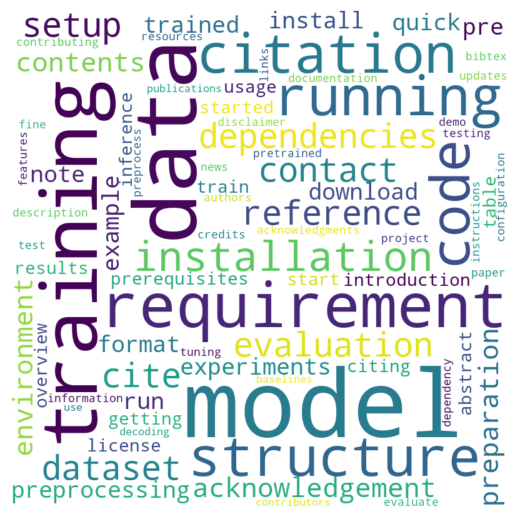

In [8]:
words_s = " ".join(words)
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=12, max_font_size=150).generate(words_s)
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)


In [9]:
def label_section_contains(df, search_column, search_params, value):
    search_string = "|".join(search_params)
    df.loc[df[search_column].str.lower().str.contains(search_string), ["label"]
           ] += f"{value};"
    df.loc[df[search_column].str.lower().str.contains(
        search_string), ["label_count"]] += 1


def label_section_match(df: pd.DataFrame, search_column, search_params, value, compare_func):
    search_string = "|".join(search_params)
    df.loc[df[search_column].str.lower().str.fullmatch(search_string), ["label"]
           ] += f"{value};"
